In [1]:
#%matplotlib notebook  
from matplotlib import pyplot as plt
import numpy as np
import pasttrec_ctrl as ptc
import json
import sigproc_kit
import tdc_daq as td
import baseline_calib
import ROOT
import db
from cw_pasttrec_functions import *

from my_utils import *
set_width_max_of_jupyterpad()

    
def hist_rms(x,y):
  counts = np.sum(y)
  weights = y / counts
  mean = np.dot(x,weights)
  deviations = x - mean
  return np.sqrt(np.dot(deviations**2,weights))
def list_rms(x):
  mean = sum(x)/len(x)
  deviations = x - mean
  return np.sqrt(sum(deviations**2) /len(x))
def MeanArrays(xs,ys):
    return np.dot(xs,ys)/sum(ys)
def fwhm(x,y):
  dummy, t1, tot = sigproc_kit.discriminate(x,y,np.max(y)/2.,0,0)
  return tot

Welcome to JupyROOT 6.14/04


 parallel baseline scan board,  80011


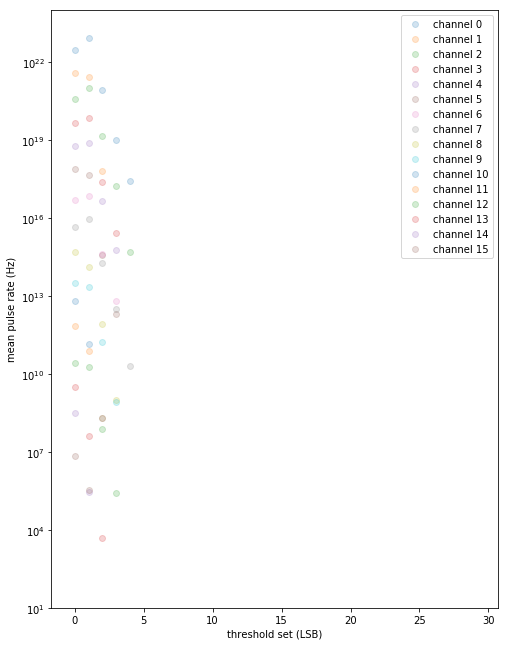

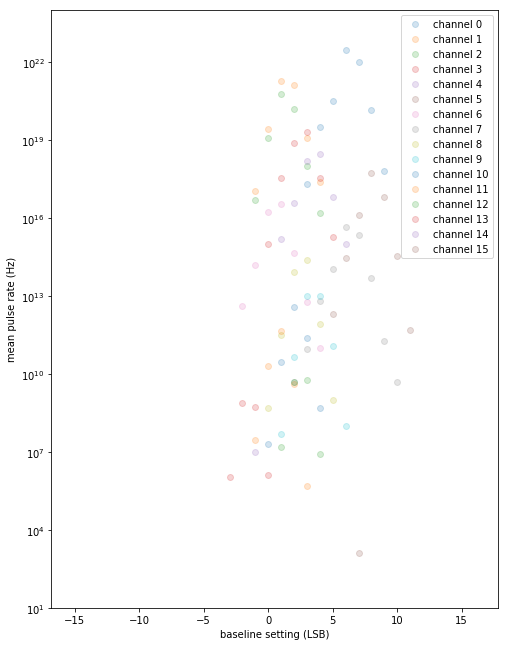

 parallel baseline scan board,  80012


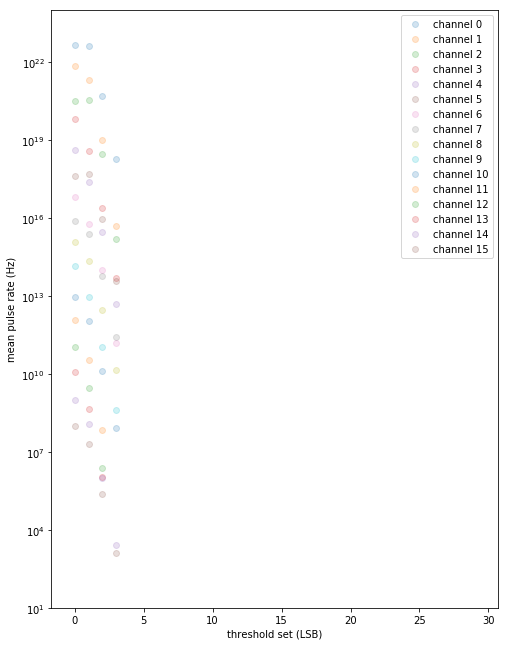

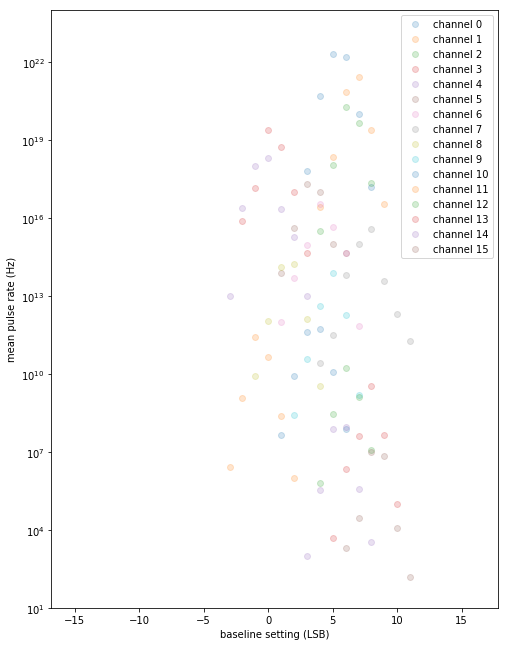

 parallel baseline scan board,  80081


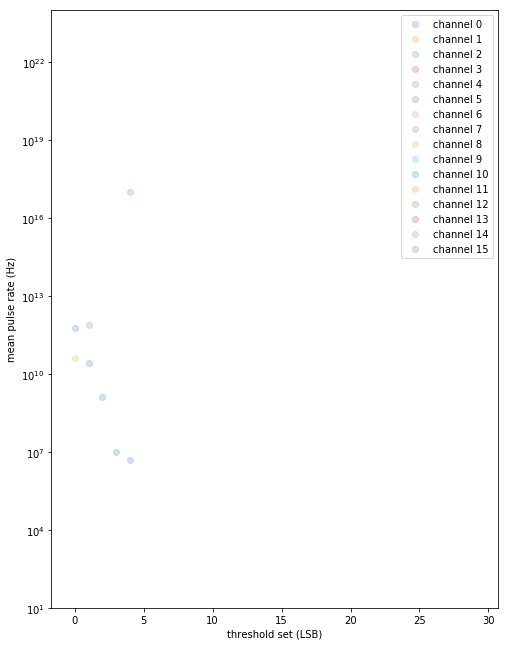

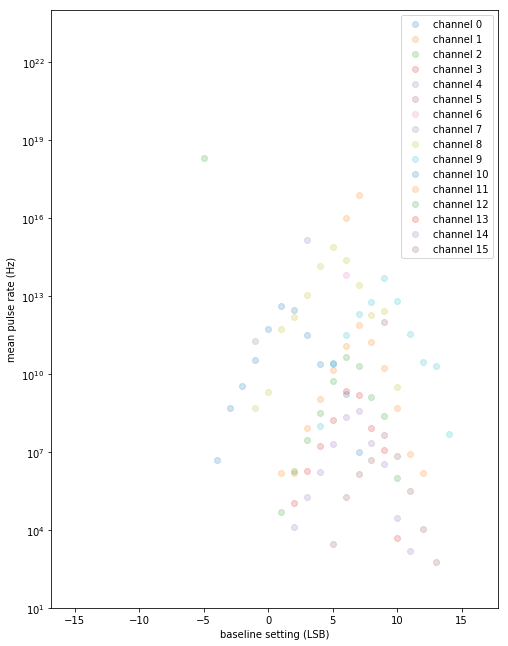

 parallel baseline scan board,  80082


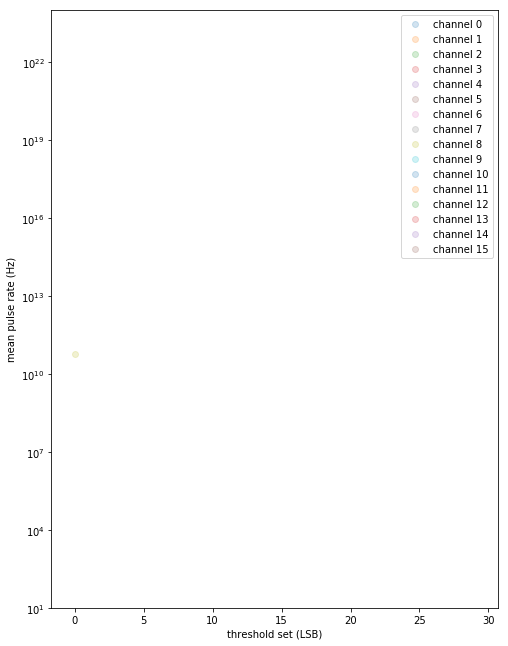

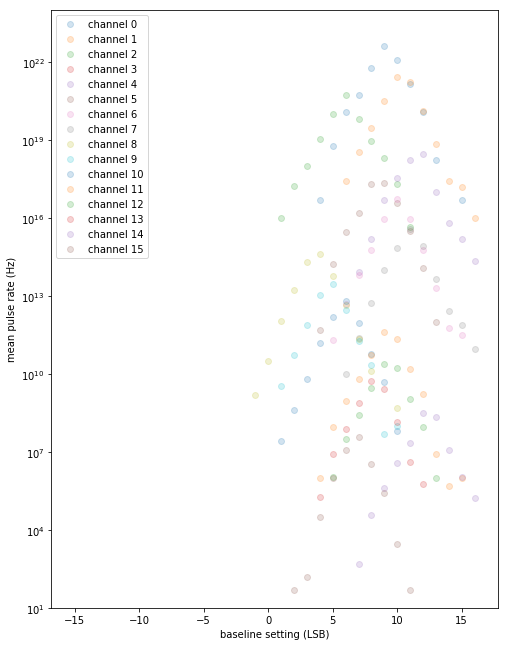

 parallel baseline scan board,  80083


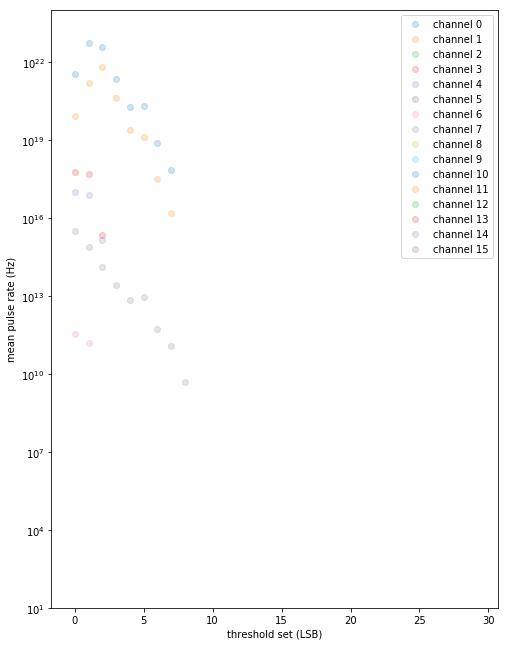

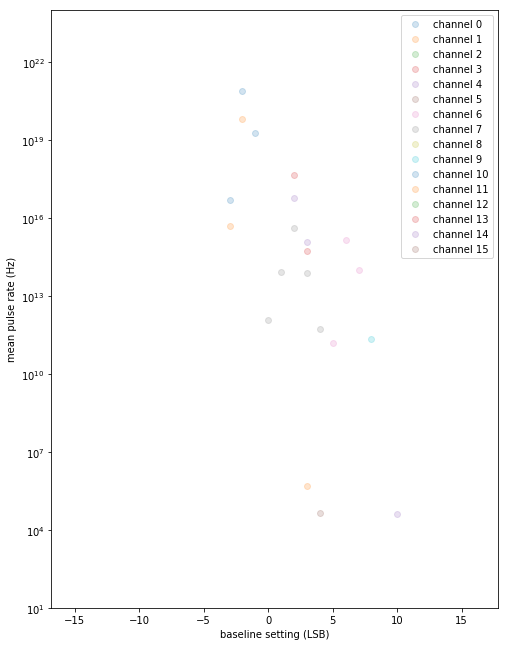

 parallel baseline scan board,  80084


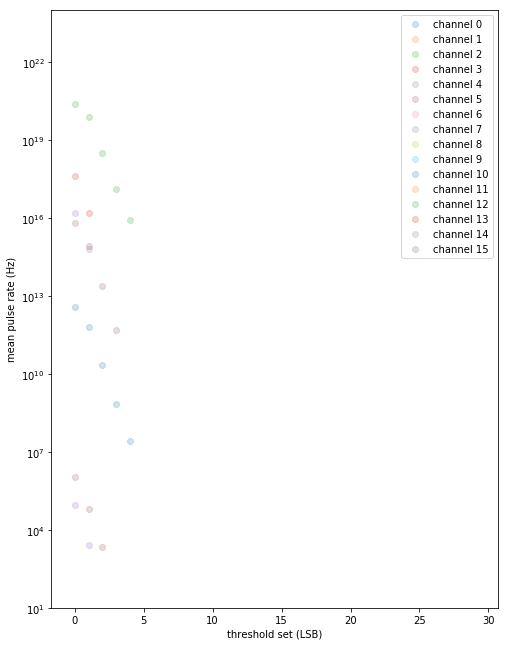

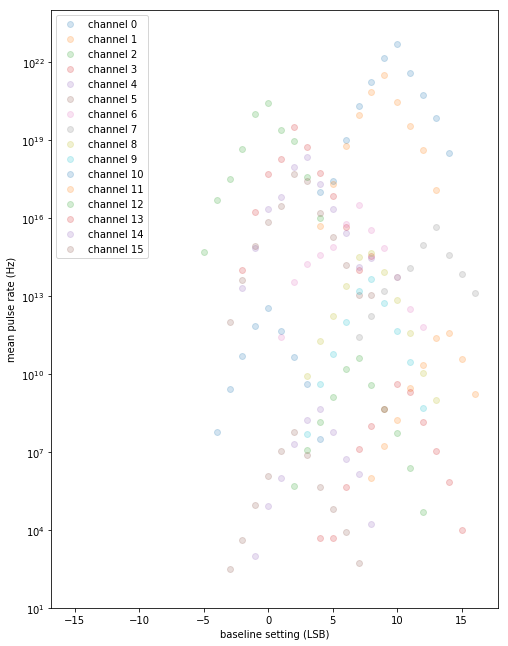

 parallel baseline scan board,  80091


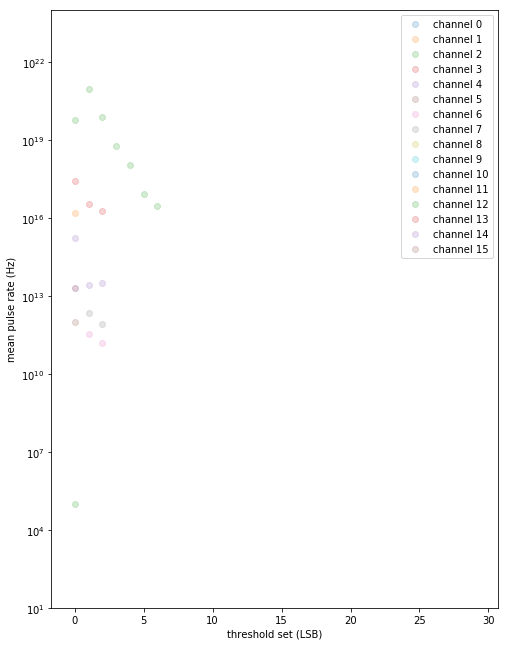

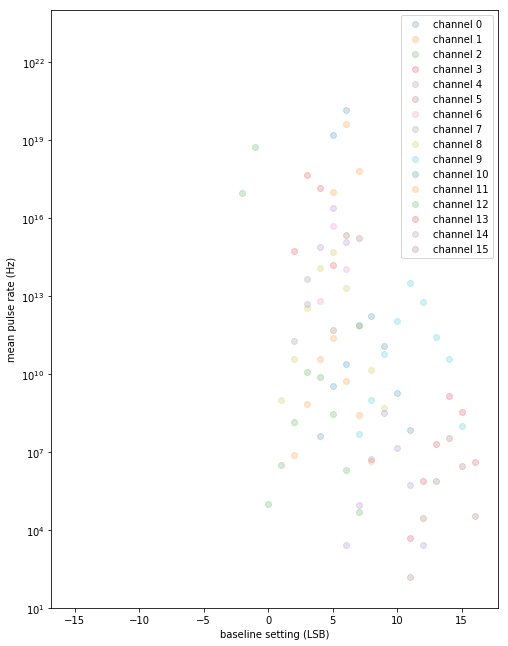

 parallel baseline scan board,  80092


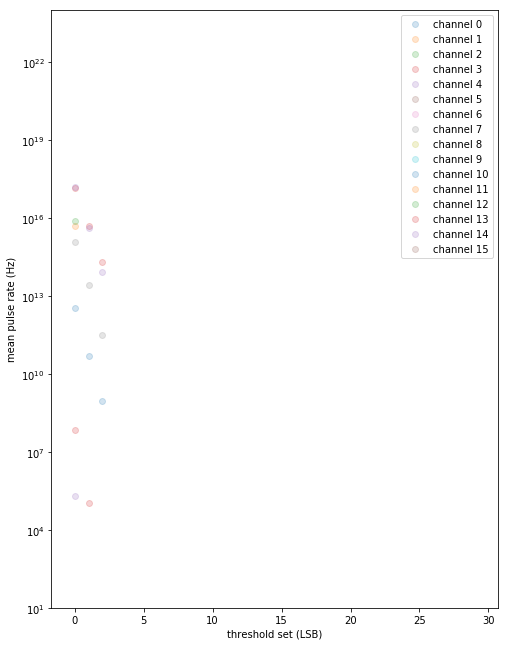

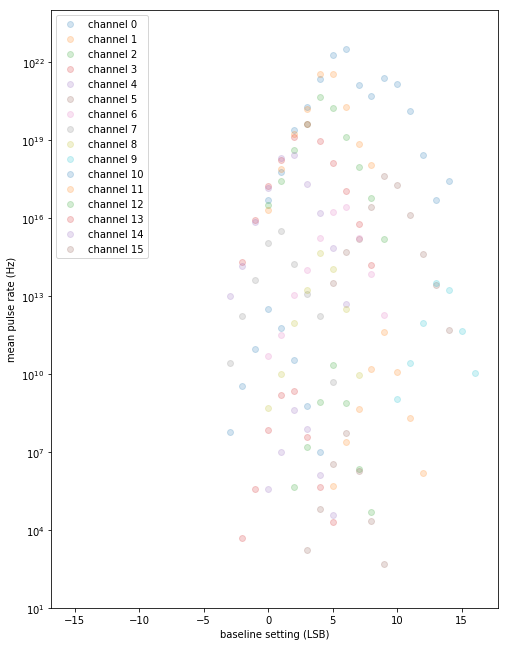

 parallel baseline scan board,  80093


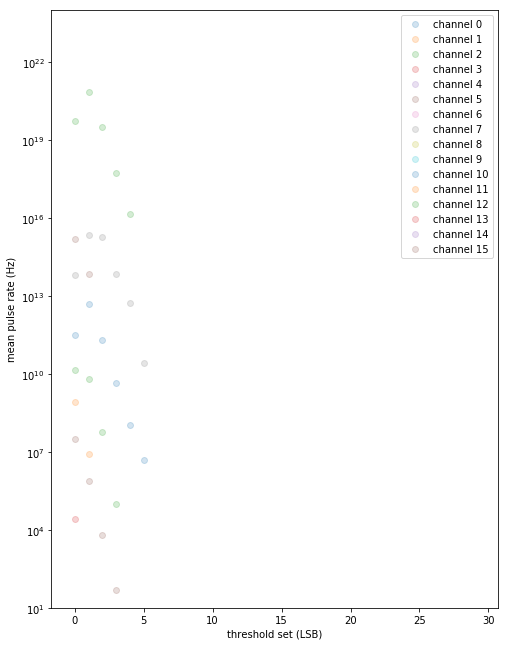

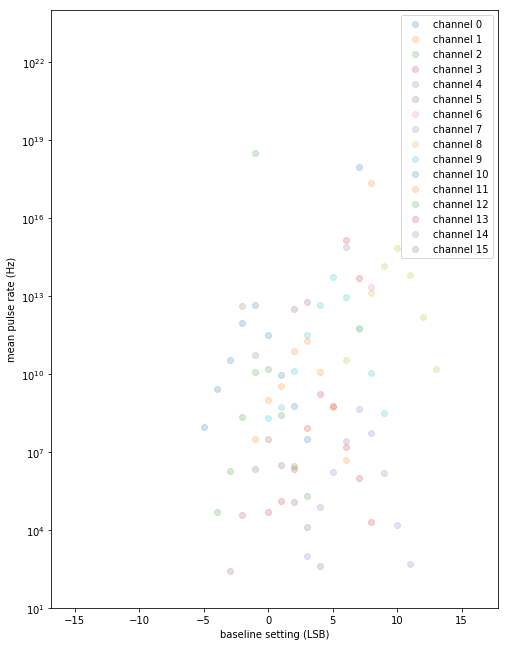

 parallel baseline scan board,  80094


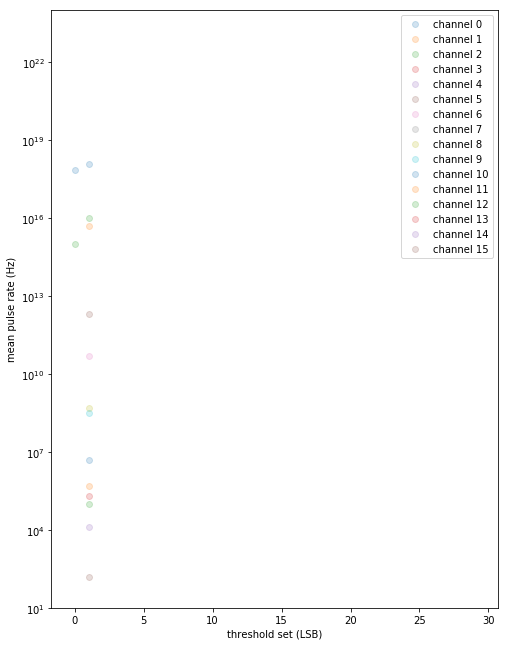

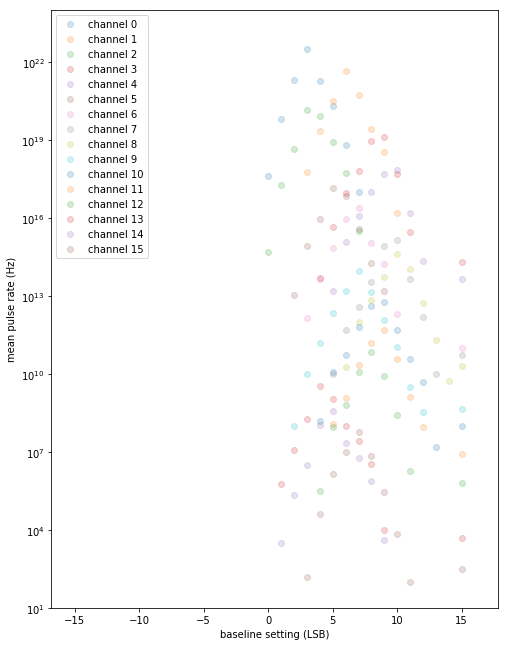

In [2]:
#names=[ "80121"]
#names=[ "80121","80122","80123","80124"  ]
names=[ "80011" , "80012",  "80081",  "80082",  "80083",  "80084" , "80091" ,  "80092",  "80093",  "80094"]
pktime = 10
gain = 4
thresh = 5

for name in names:
#    ptc.init_active_boards()  
    ptc.init_board_by_name(name,pktime,gain,thresh)
 
    
    print(" parallel baseline scan board, ", name)
    baseline_calib.baseline_calib_by_noise(name, dummy_calib=True,individual=False) 
    #baseline_calib.set_baselines_individual(name, [15]*16 )   
    
    
    baseline_calib.char_noise_by_thresh_scan(name,dummy_calib=True)        
    #read threshold_scan from database:
    dummy_calib = db.get_calib_json_by_name(name,dummy_calib=True)
    tsbl_scan_raw = dummy_calib["tsbl_scan_raw"]
    tsbl_range    = dummy_calib["tsbl_range"]

     #plot current scan results for all channels:


    # baseline scan:
    noise_scan_raw = dummy_calib["noise_scan_raw"]
    noise_range    = dummy_calib["bl_range"]


    # staggerd plots:
    plt.rcParams["figure.figsize"] = (8,11)
    for i in range(0,16):
         nums = np.array(tsbl_scan_raw[i])*10**(16-i)
         plt.scatter(tsbl_range,nums,alpha=0.2,label = "channel {:d}".format(i))

         plt.legend()
         plt.xlabel("threshold set (LSB)")
         plt.ylabel("mean pulse rate (Hz)")

    plt.yscale('log') 
    plt.ylim(ymax = 1E24, ymin = 1E1)
    plt.show()
    # baseline 
    plt.rcParams["figure.figsize"] = (8,11)
    for i in range(0,16):
         nums = np.array(noise_scan_raw[i])*10**(16-i)
         plt.scatter(noise_range, nums,alpha=0.2,label = "channel {:d}".format(i))

         plt.legend()
         plt.xlabel("baseline setting (LSB)")
         plt.ylabel("mean pulse rate (Hz)")

    plt.yscale('log') 
    plt.ylim(ymax = 1E24, ymin = 1E1)
    plt.show()
    
    import time
    # save noise scan to ascii file
    np.savetxt("data_noise_shielding/noise_board_{}_baselines_time{:.0f}.txt".format(name,time.time()),noise_scan_raw,delimiter=',');
    np.savetxt("data_noise_shielding/noise_board_{}_thresholdScan_time{:.0f}.txt".format(name,time.time()),tsbl_scan_raw,delimiter=',');
    
ptc.init_active_boards()


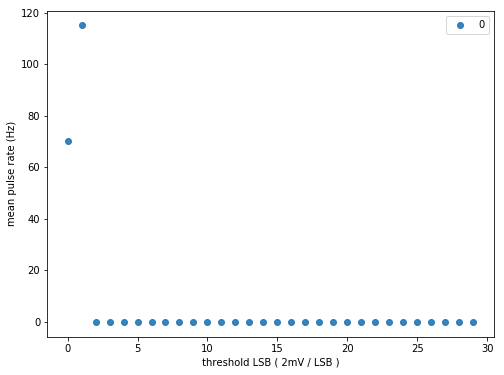

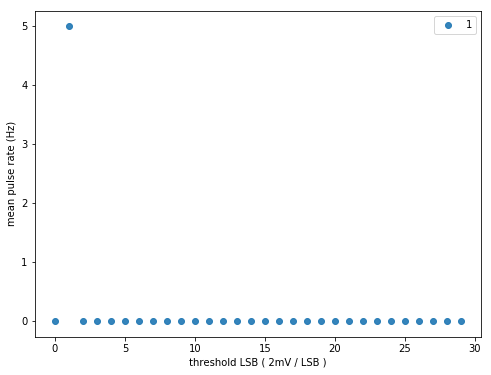

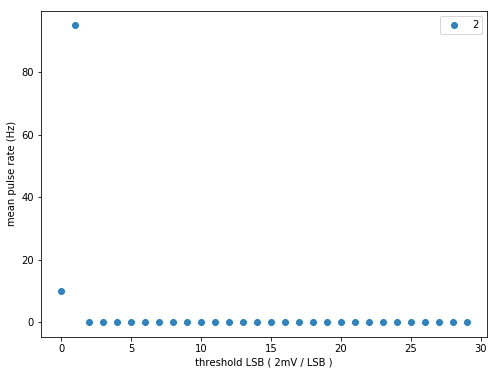

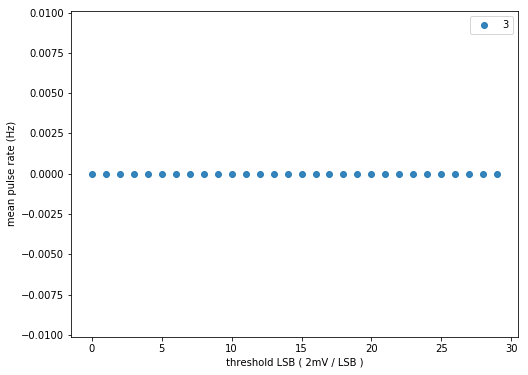

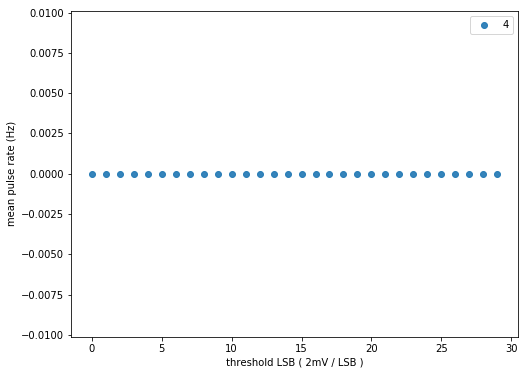

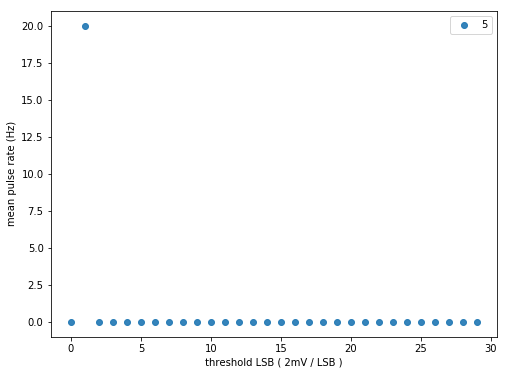

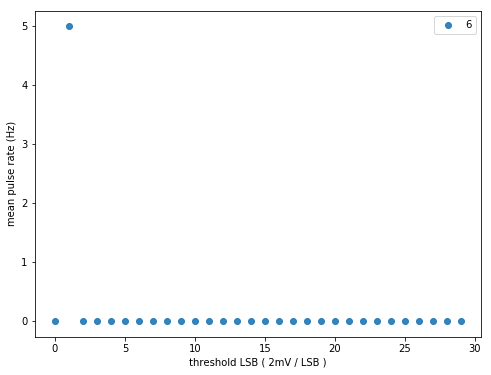

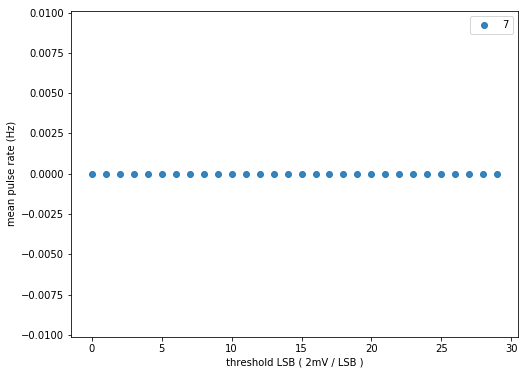

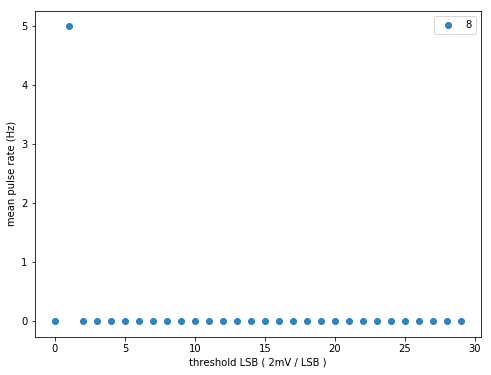

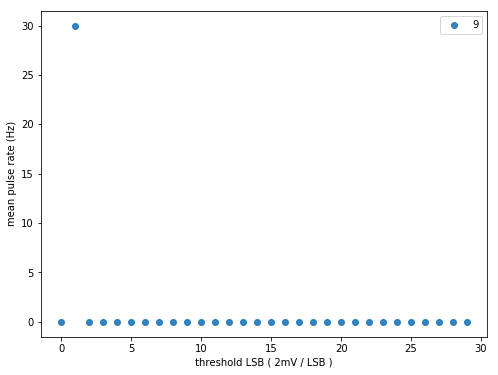

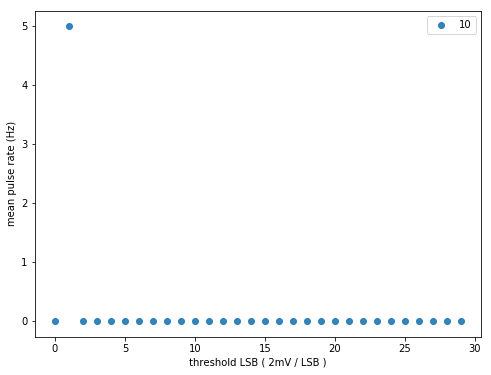

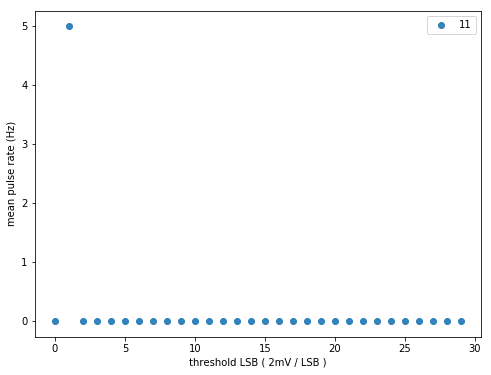

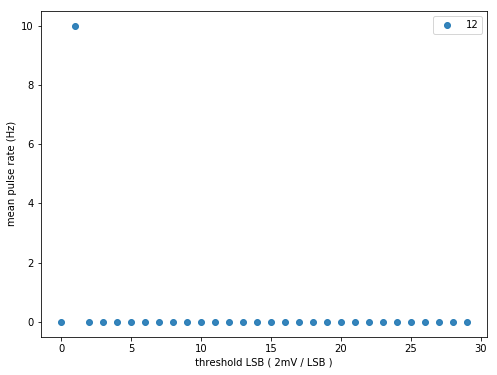

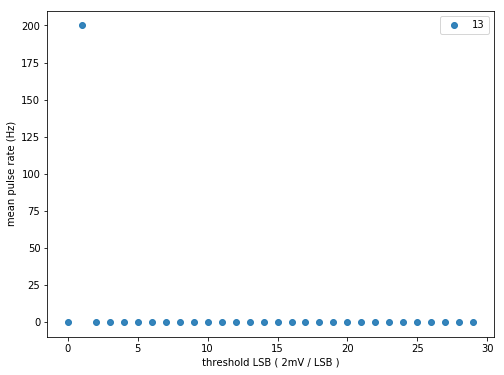

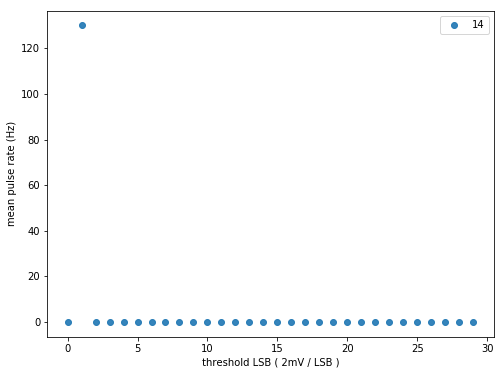

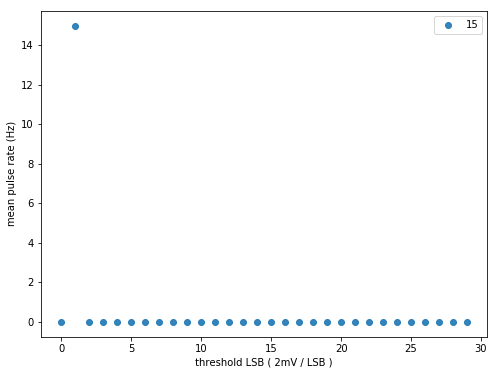

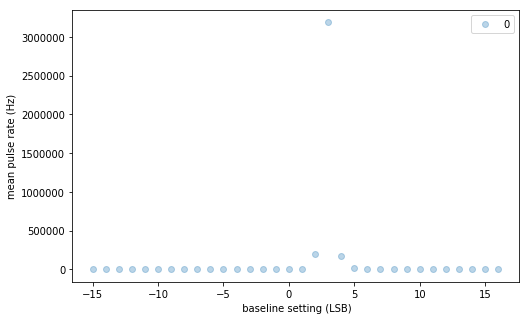

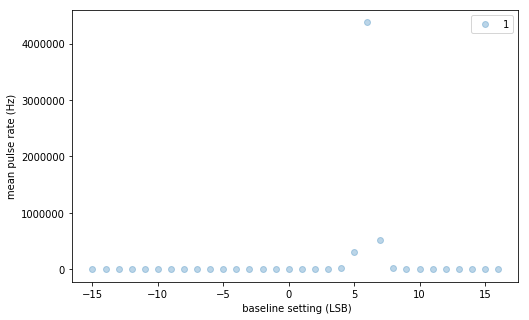

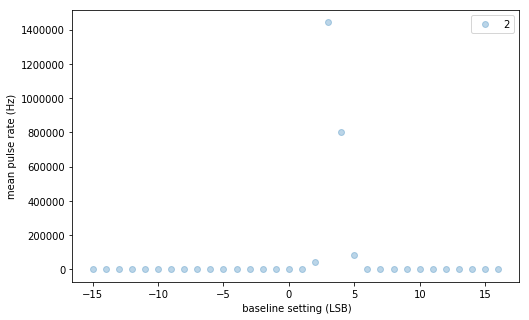

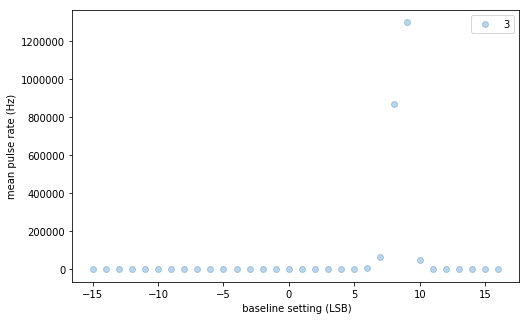

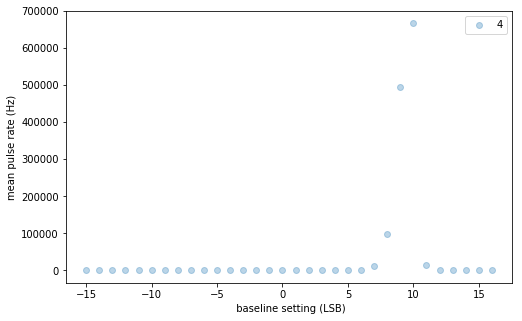

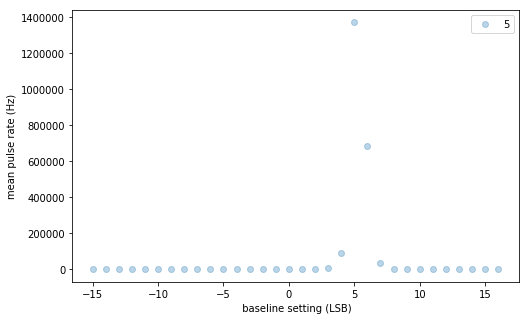

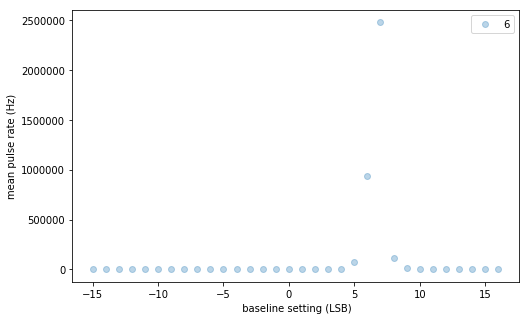

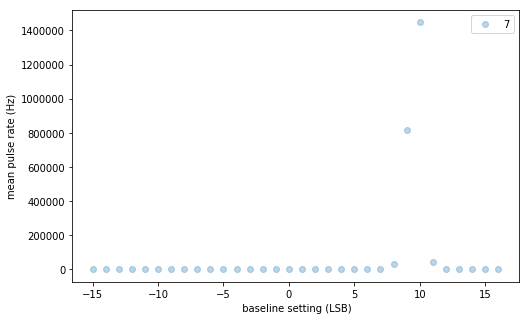

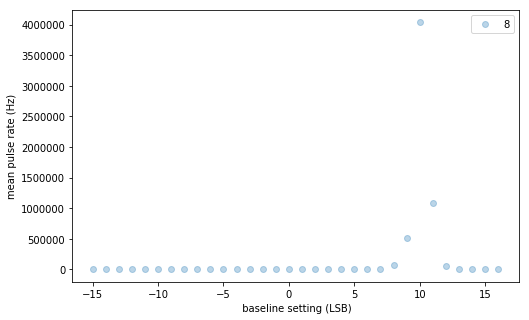

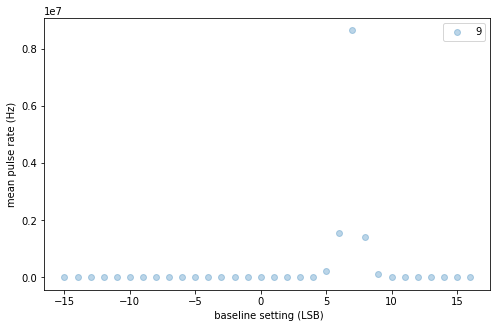

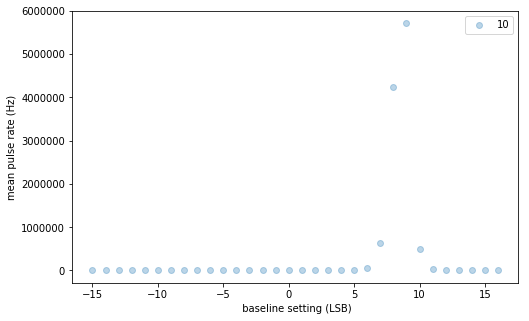

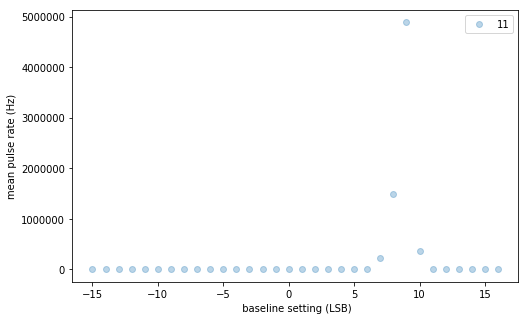

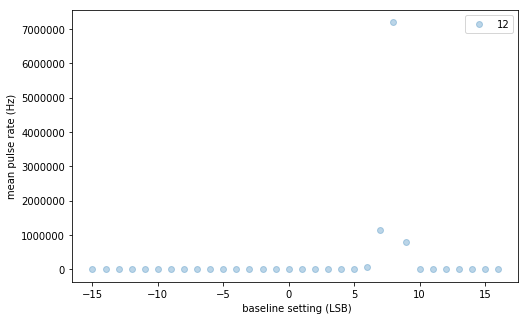

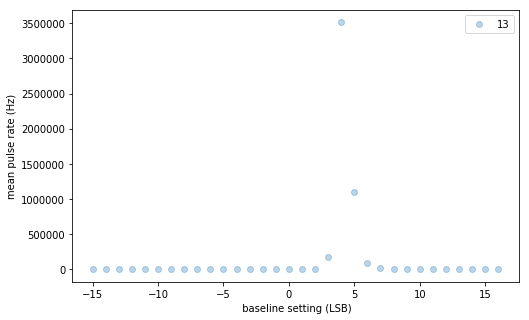

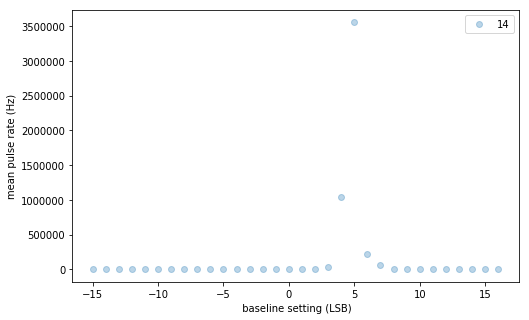

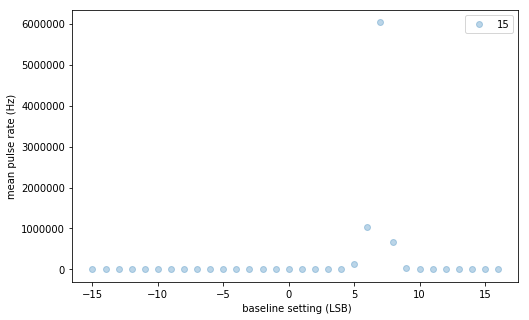

0 0.4849826606736854
1 0.0
2 0.29354352395090366
5 0.0
6 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [3]:
import time


plt.rcParams["figure.figsize"] = (8,6)
for i in range(0,16):#
 plt.scatter(tsbl_range,tsbl_scan_raw[i],alpha=0.9,label = "{:d}".format(i))

 plt.legend()
 plt.xlabel(" threshold LSB ( 2mV / LSB ) ")
 plt.ylabel("mean pulse rate (Hz)")
 #plt.yscale('log') 
 #plt.ylim(ymax = 1E19, ymin = 1E-1)
 #plt.xlim(xmin = 0, xmax = 10)
 plt.show()
plt.rcParams["figure.figsize"] = (8,5)
for i in range(0,16):
  plt.scatter(noise_range,noise_scan_raw[i],alpha=0.3,label = "{:d}".format(i))
  plt.legend()
  plt.xlabel("  baseline setting (LSB) ")
  plt.ylabel("mean pulse rate (Hz)")
  #plt.yscale('log') 
  plt.show()
    

for i in range(0,16):#
    # plt.scatter(tsbl_range,tsbl_scan_raw[i],alpha=0.9,label = "{:d}".format(i))
    if hist_rms(tsbl_range,tsbl_scan_raw[i]) < 0.5 :
        print(i,hist_rms(tsbl_range,tsbl_scan_raw[i]))
        #mean_list += [ MeanArrays(tsbl_range,tsbl_scan_raw[i]) ] 

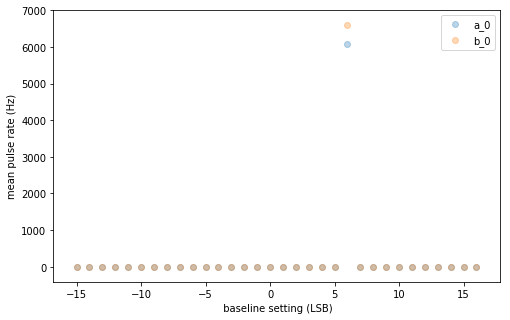

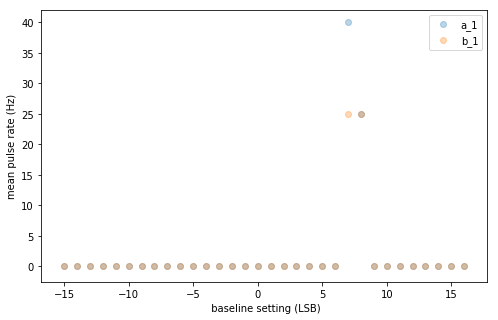

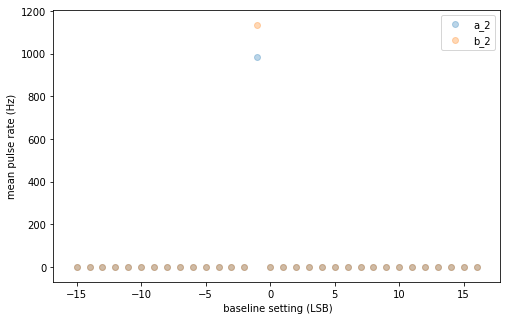

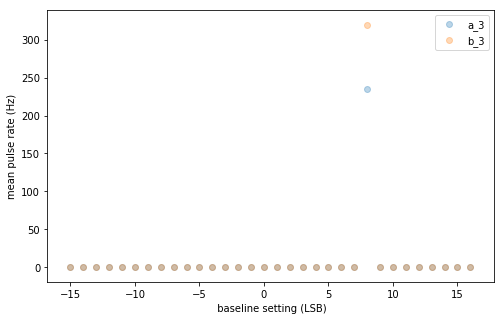

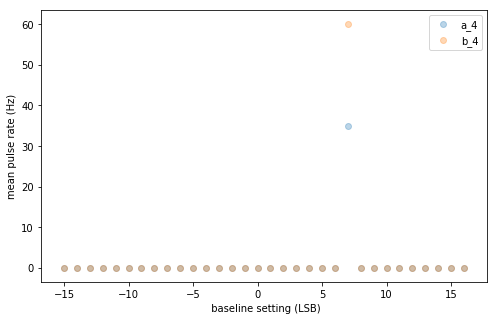

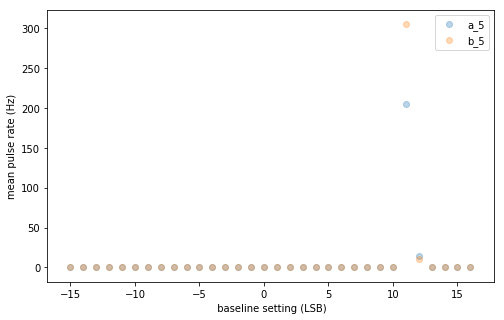

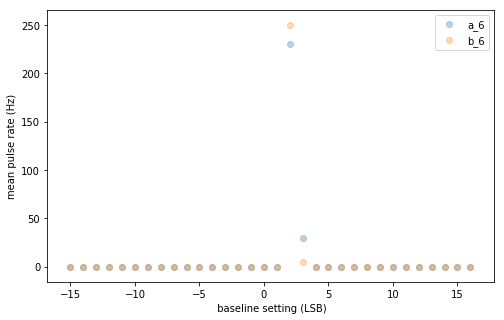

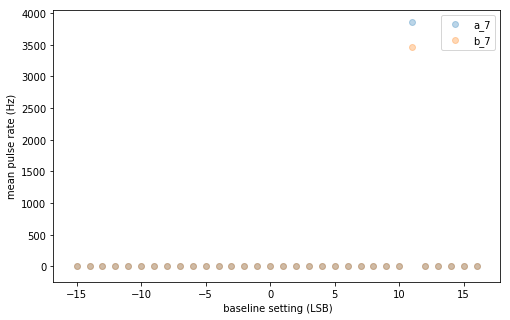

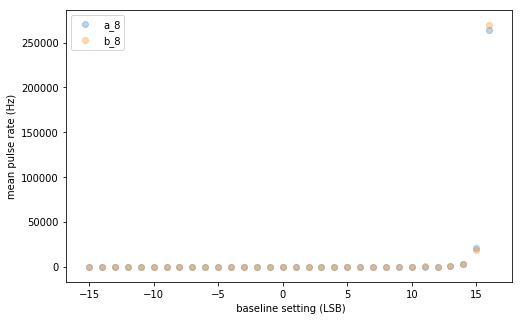

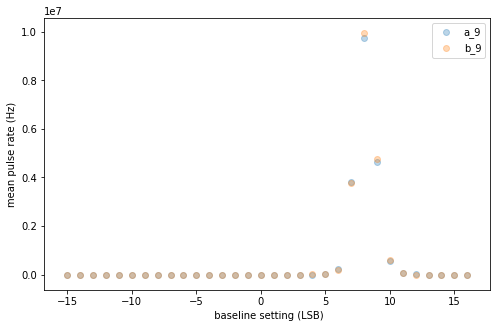

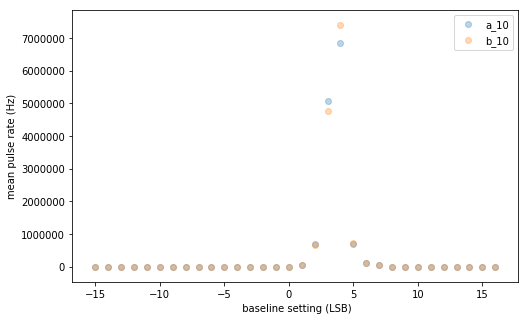

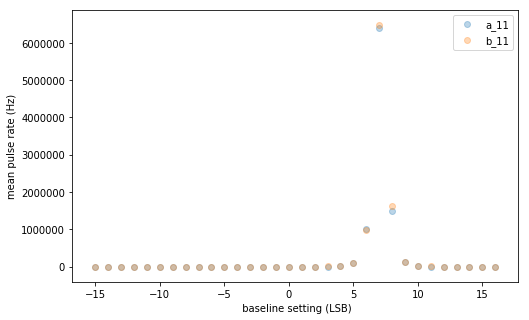

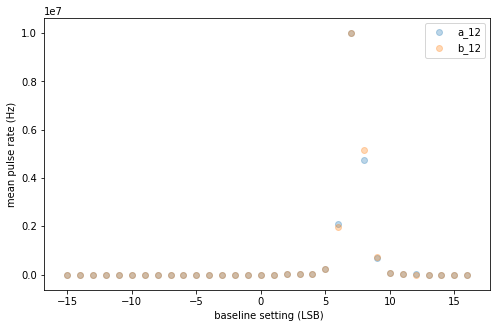

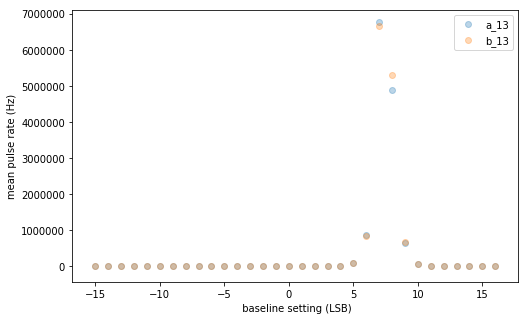

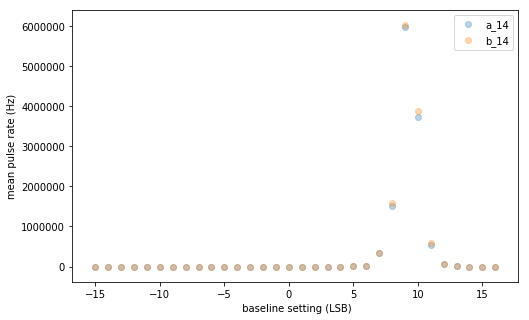

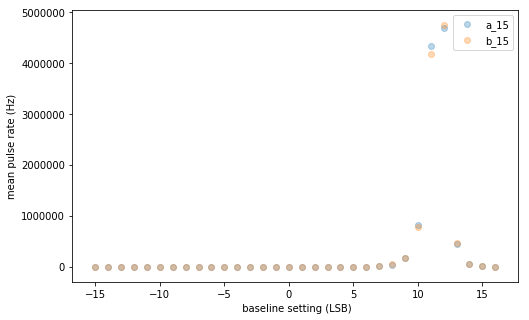

In [4]:
noise_scan_raw = np.loadtxt("baselines_80121_1.txt",delimiter=',');
noise_scan_raw_2 = np.loadtxt("baselines_80121.txt",delimiter=',');


for i in range(0,16):
  plt.scatter(noise_range,noise_scan_raw[i],alpha=0.3,label = "a_{:d}".format(i))
  plt.scatter(noise_range,noise_scan_raw_2[i],alpha=0.3,label = "b_{:d}".format(i))
  plt.legend()
  plt.xlabel("  baseline setting (LSB) ")
  plt.ylabel("mean pulse rate (Hz)")
  #plt.yscale('log') 
  plt.show()


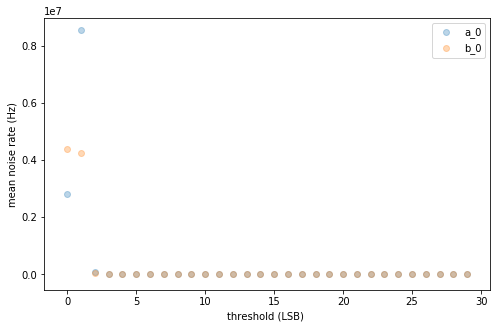

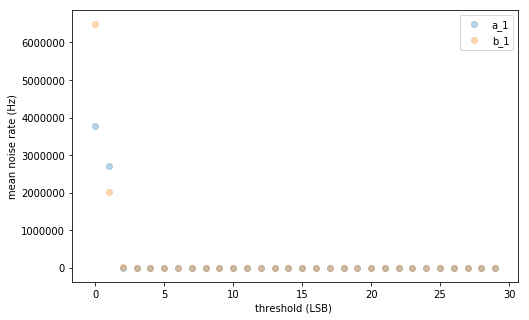

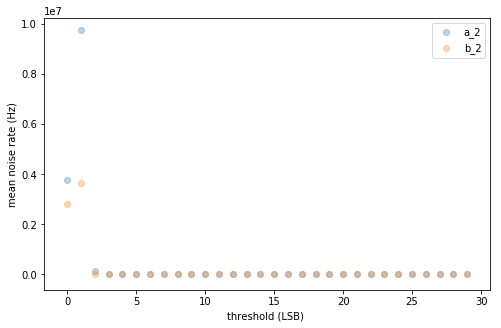

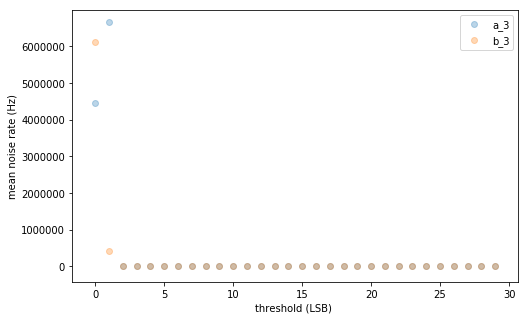

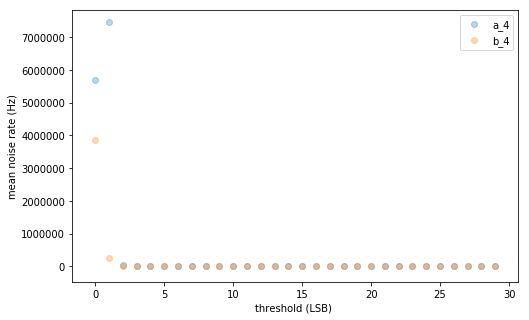

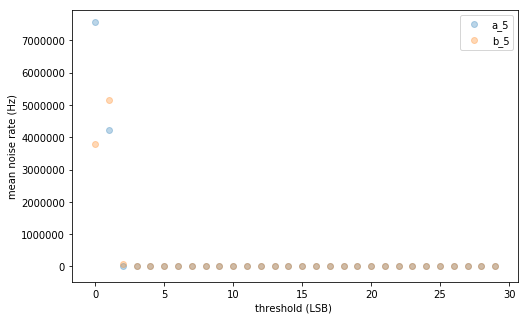

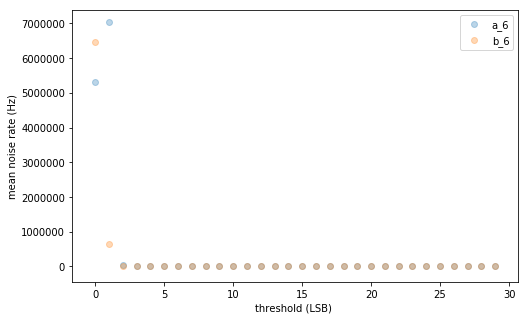

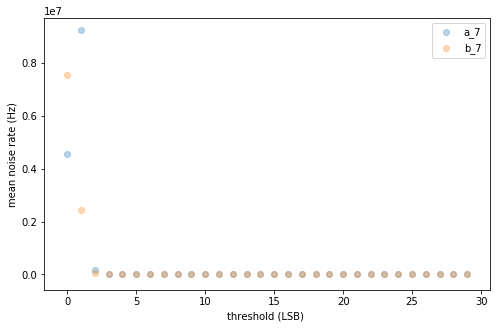

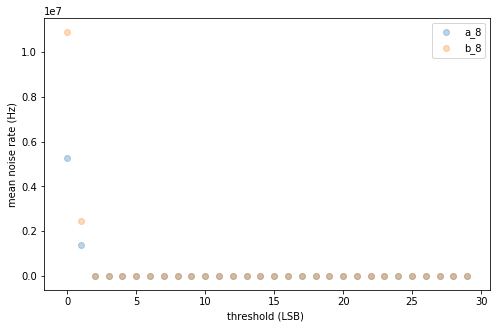

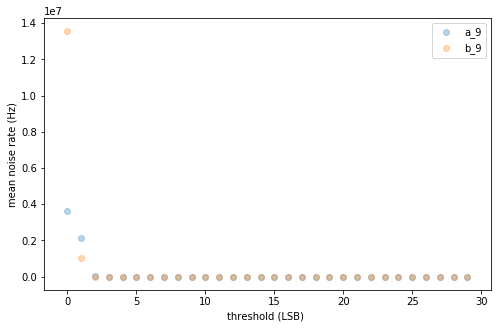

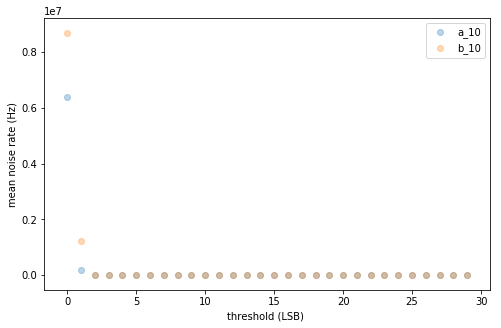

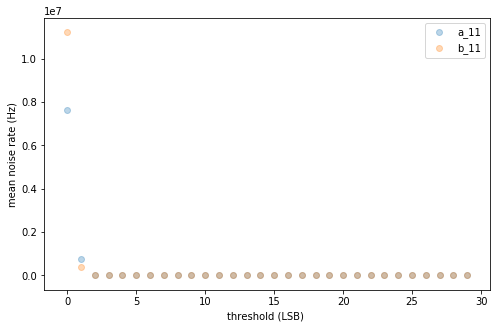

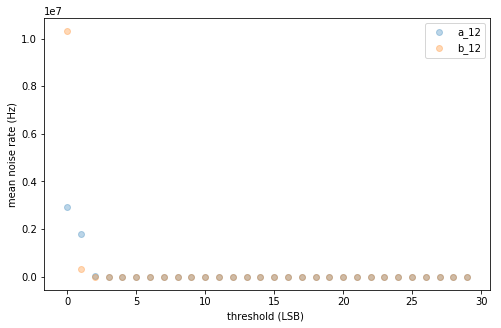

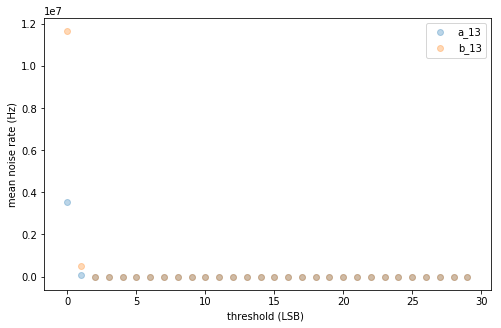

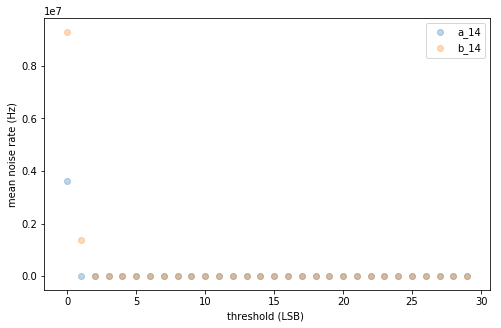

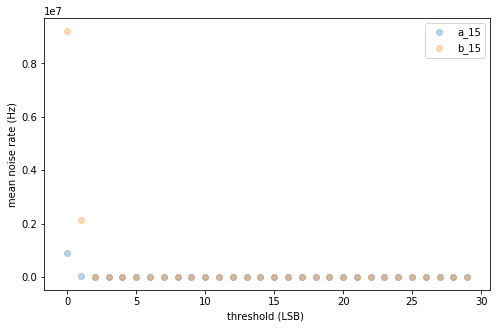

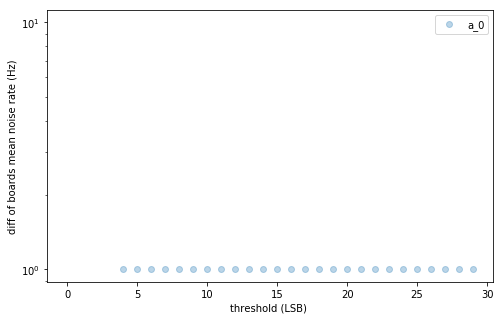

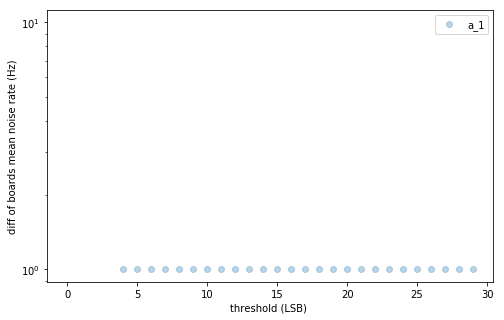

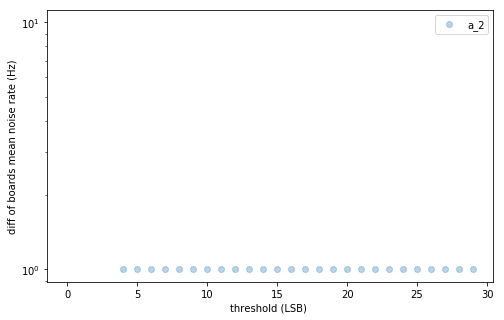

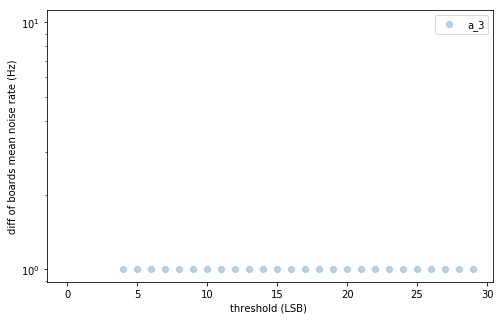

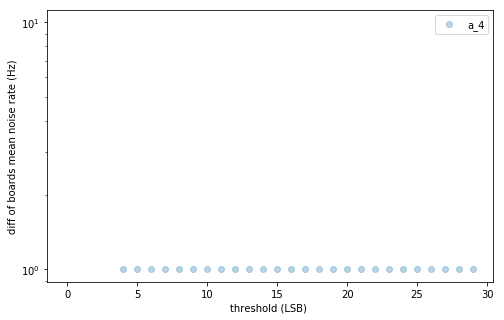

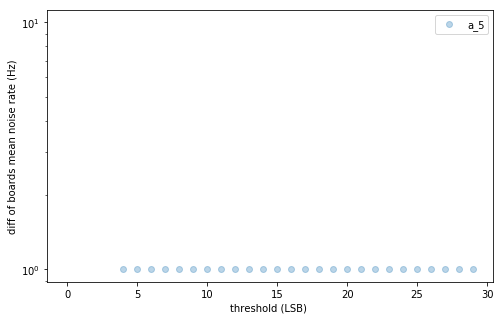

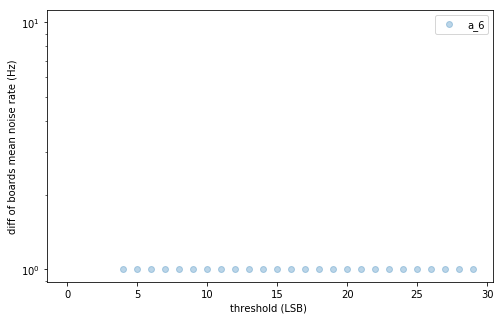

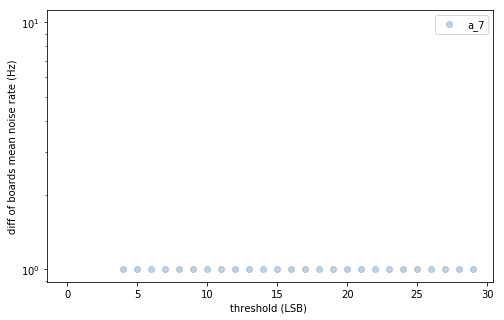

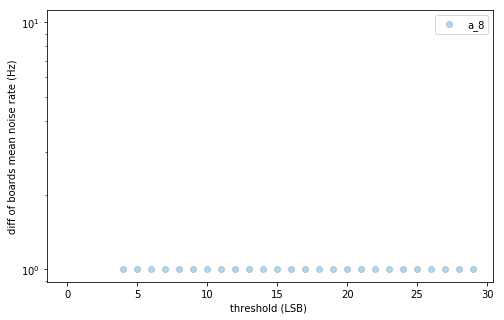

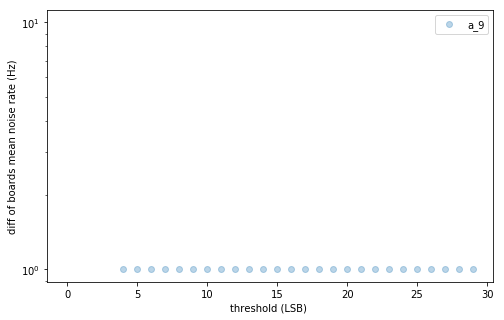

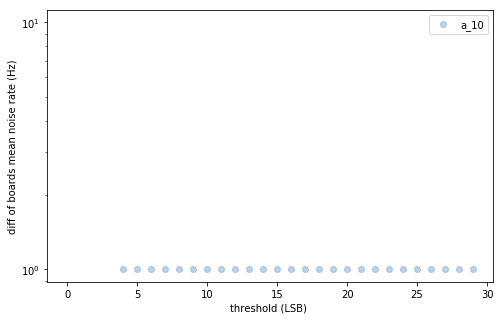

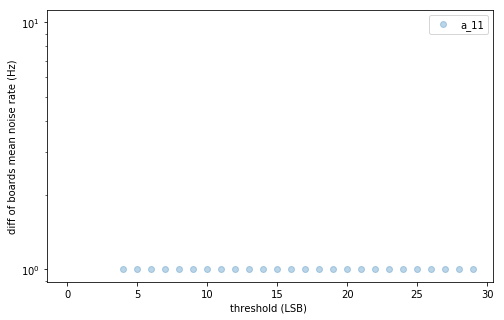

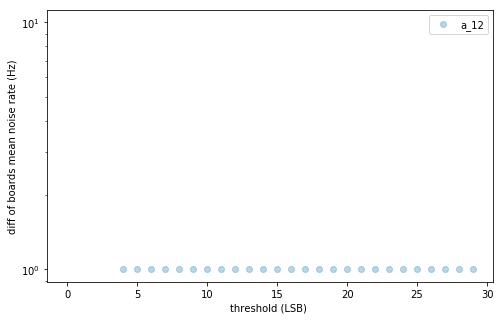

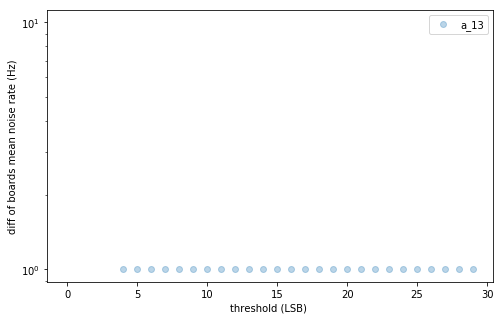

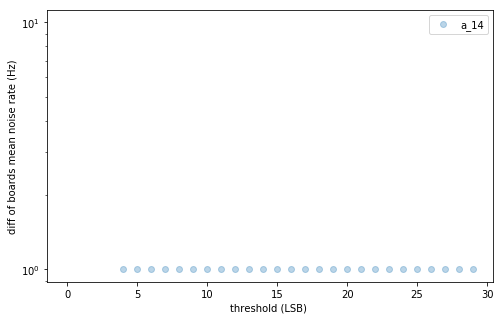

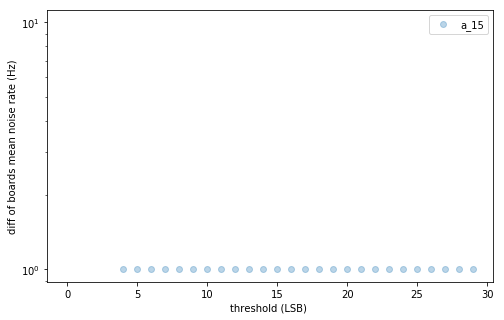

In [9]:
noise_scan_raw = np.loadtxt("noise_board_80011_thresholdScan_time1667493060.txt",delimiter=',');
noise_scan_raw_2 = np.loadtxt("noise_board_80012_thresholdScan_time1667493078.txt",delimiter=',');

for i in range(0,16):
  plt.scatter(range(0,len(noise_scan_raw[i])),noise_scan_raw[i],alpha=0.3,label = "a_{:d}".format(i))
  plt.scatter(range(0,len(noise_scan_raw_2[i])),noise_scan_raw_2[i],alpha=0.3,label = "b_{:d}".format(i)) 
  plt.legend()
  plt.xlabel("threshold (LSB) ")
  plt.ylabel("mean noise rate (Hz)")
  #plt.yscale('log') 
  plt.show()
diff=noise_scan_raw[i]-noise_scan_raw_2[i]
#diff=diff+1
for i in range(0,16):
  plt.scatter(range(0,len(noise_scan_raw[i])),diff,alpha=0.3,label = "a_{:d}".format(i))
  
  plt.legend()
  plt.xlabel("threshold (LSB) ")
  plt.ylabel("diff of boards mean noise rate (Hz)")
  #plt.yscale('log') 
  plt.show()